In [0]:
# !pip uninstall tensorflow

In [0]:
# !pip install tensorflow==2.0.0
# !pip install tf-nightly

In [3]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import sys
import warnings
from keras import layers
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
dataset = pd.read_csv('train_sms_mine.csv', encoding='cp1252')

In [5]:
dataset.head

<bound method NDFrame.head of              Label                                            Message
0         Delivery  Dear Guest, Thanks for choosing The Edison. Or...
1            Hotel  Welcome to Southern University at Shreveport R...
2          Payment  Bill dated 2013-01-14 for Rs 626 has been gene...
3          Payment  Bill dated 2014-11-30 for Rs 323 has been gene...
4      Appointment  DEAR Zachary, THANK YOU FOR YOUR BOOKING (ORDE...
...            ...                                                ...
41995          ham                               ok that works for me
41996         spam  Delivered: Your package withSri High Quality S...
41997          ham                      Let us dine at the Taj on Sat
41998         spam  Delivered: Your package withSeCro (Pack of 2) ...
41999         spam  OTP is 676348 for the txn of INR 6540.00 at Ar...

[42000 rows x 2 columns]>

In [0]:
bank =[]
payement = []
bill = []
info = []
ham = []
appointment = []
hotel = []
pickup = []
transaction = []

In [0]:
for i in range(len(dataset)):
  if dataset['Label'][i] == 'bank':
    bank.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'bill':
    bill.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'Payment':
    payement.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'info':
    info.append(dataset['Message'][i])
  elif dataset['Label'][i] =='ham':
    ham.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'Appointment':
    appointment.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'Hotel':
    hotel.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'PickUp':
    pickup.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'transaction':
    transaction.append(dataset['Message'][i])
  else:
    continue

In [0]:
data = pd.DataFrame(columns=['Text','Label',])

In [0]:
text = []
label = []
for tex in bank:
  text.append(tex)
  label.append(1)
for tex in bill:
  text.append(tex)
  label.append(1)
for tex in payement:
  text.append(tex)
  label.append(1)
for tex in pickup:
  text.append(tex)
  label.append(1)
for tex in transaction:
  text.append(tex)
  label.append(1)
##### Neg

for tex in info:
  text.append(tex)
  label.append(0)
for tex in ham:
  text.append(tex)
  label.append(0)
for tex in appointment:
  text.append(tex)
  label.append(0)
for tex in hotel:
  text.append(tex)
  label.append(0)

In [10]:
data['Text'] = text
data['Label'] = label
data.head

<bound method NDFrame.head of                                                     Text  Label
0      Bill dated 2013-01-14 for Rs 626 has been gene...      1
1      Bill dated 2014-11-30 for Rs 323 has been gene...      1
2      Bill dated 2012-09-07 for Rs 501 has been gene...      1
3      Bill dated 2010-01-27 for Rs 273 has been gene...      1
4      Bill dated 2009-10-20 for Rs 1080 has been gen...      1
...                                                  ...    ...
27370  Welcome to Fossil Ridge Park R.No. 195, 132, 1...      0
27371  Welcome to Curwood Castle R.No. 491, 236 Ch.In...      0
27372  Welcome to MAINSOURCE FNCL GRP R.No. 203, 174,...      0
27373  Welcome to Seto Inland Sea R.No. 384, 198 Ch.I...      0
27374  Welcome to National Aviary R.No. 109, 589, 533...      0

[27375 rows x 2 columns]>

In [11]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index()
data.head

<bound method NDFrame.head of                                                     Text  Label
25111                                 Ok! See you there!      0
16879                             remember at Total Mall      0
21806                                ohh, thanks a lot !      0
11766  Dear Guest, Thanks for choosing Blimpy Burger....      0
24833                            call john mobile number      0
...                                                  ...    ...
3980   DEAR Luke, THANK YOU FOR YOUR BOOKING (ORDER I...      0
20094  Opening ceremony is on on the day after Diwali...      0
1118   Repair ref.no for your car is JC31563472 opene...      1
22990                  Cool, I'll pick you up in an hour      0
23132                   i have to go to the party on tue      0

[27375 rows x 2 columns]>

In [0]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "cause": "because", "could've": "could have","this's" : "this is"}

In [0]:
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
  def replace(match):
    return contractions[match.group(0)]
  return contractions_re.sub(replace, text)
  

In [0]:
for msg in data["Text"] :
  replace_contractions(msg)

In [0]:
def clean_data(x):
  punctuation = '.!"#$%&()*+-/:,;<=>?@[\\]^_`{|}~'
  x = x.apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))
  x = x.str.lower()
  x = x.str.replace("[0-9]", " ")
  x = x.apply(lambda x: ' '.join(x.split()))
  return x

In [0]:
cleaned = clean_data(data["Text"])

In [0]:
# cleaned2=[]
# for msg in cleaned:
#   cleaned2.append(nltk.word_tokenize(msg))

In [0]:
# dataset["Text"] = cleaned2

In [0]:
# dataset["Text"].apply(lambda x: [item for item in x if item not in stop])

In [20]:
# from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 25000
MAX_SEQUENCE_LENGTH = 10
EMBEDDING_DIM = 20

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n“”’\'∞θ÷α•à−β∅³π‘₹´°£€\×™√²—', lower=True)
# tokenizer = pickle.load(open('_tokenizer.pkl', 'rb'))
tokenizer.fit_on_texts(data['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 31634 unique tokens.


In [21]:
# from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(data['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (27375, 10)


In [22]:
Y = pd.get_dummies(data['Label']).values.astype('float32')
print('Shape of label tensor:', Y.shape)
Y[3]

Shape of label tensor: (27375, 2)


array([1., 0.], dtype=float32)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(24637, 10) (24637, 2)
(2738, 10) (2738, 2)


In [0]:
embedding_dim = 20
dropout = 0.2
optimizer = 'adam'

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=X.shape[1]),
                             tf.keras.layers.SpatialDropout1D(0.2),
                             tf.keras.layers.GRU(32, dropout=0.2, recurrent_dropout=0.2),
                            #  tf.keras.layers.Dense(128,activation='relu'),
                            #  tf.keras.layers.Dropout(dropout),
                            #  tf.keras.layers.Dense(64,activation='relu'),
                            #  tf.keras.layers.Dropout(dropout),
                             tf.keras.layers.Dense(16,activation='relu'),
                             tf.keras.layers.Dropout(dropout),
                             tf.keras.layers.Dense(8,activation='relu'),
                             tf.keras.layers.Dropout(dropout),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dropout(dropout),
                             tf.keras.layers.Dense(2,activation='sigmoid')])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 20)            500000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 10, 20)            0         
_________________________________________________________________
gru (GRU)                    (None, 32)                5184      
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [28]:
callback = callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)
# history = model.fit(X_train, Y_train, epochs=15, batch_size=64,validation_split=0.1,callbacks=[callback])
history = model.fit(X_train, Y_train, epochs=100, batch_size=128,validation_split=0.1)

Epoch 1/100
174/174 [==============================] - 4s 22ms/step - loss: 0.3419 - accuracy: 0.9013 - val_loss: 0.0990 - val_accuracy: 0.9282
Epoch 2/100
174/174 [==============================] - 4s 21ms/step - loss: 0.2105 - accuracy: 0.9265 - val_loss: 0.0970 - val_accuracy: 0.9282
Epoch 3/100
174/174 [==============================] - 3s 19ms/step - loss: 0.2054 - accuracy: 0.9270 - val_loss: 0.0974 - val_accuracy: 0.9282
Epoch 4/100
174/174 [==============================] - 3s 19ms/step - loss: 0.1942 - accuracy: 0.9264 - val_loss: 0.0977 - val_accuracy: 0.9282
Epoch 5/100
174/174 [==============================] - 4s 20ms/step - loss: 0.1460 - accuracy: 0.9274 - val_loss: 0.0979 - val_accuracy: 0.9282
Epoch 6/100
174/174 [==============================] - 3s 19ms/step - loss: 0.1119 - accuracy: 0.9272 - val_loss: 0.0978 - val_accuracy: 0.9282
Epoch 7/100
174/174 [==============================] - 3s 19ms/step - loss: 0.1088 - accuracy: 0.9298 - val_loss: 0.0974 - val_accuracy:

In [29]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

86/86 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.9156
Test set
  Loss: 0.529
  Accuracy: 0.916


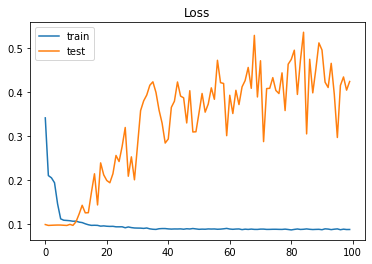

In [46]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

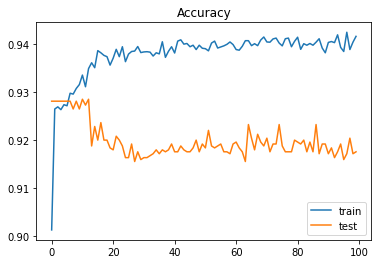

In [31]:
history
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [0]:
def predictor(str):
  new_sms = [str]
  seq = tokenizer.texts_to_sequences(new_sms)
  padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
  pred = model.predict(padded)
  if(np.argmax(pred)) == 0:
    return "Non Financial"
  else:
    return "Financial"

In [0]:
import pickle
filename = '_tokenizer2.0.pkl'
pickle.dump(tokenizer, open(filename, 'wb'))

In [0]:
model.save("_classifier_LSTM2.0.h5")

In [0]:
test_message = ['Step into season with Alkaram Studios spring/summer collection & enjoy designs celebrating spring! with 50% off',
                'Storm Fibre(powered by Cybernet) High Speed Internet +HDTv (unlimited) upto 100mb packages 10mb 1999+tax 20mb 2999+tax 30mb 3999+tax callnow 03208449106',
                "AOA Sir! Today I won't come to office",
                'Bill Payment From: Waqas Amount: SAR 9,938.63 Biller: 018 Date: 2019-12-14 14:11:39',
                "Dear Customer, Online Clearing Cheque amounting to 50,000 has been credited to your BAHL account 0029XXXXX 0n 11-2-20",
                "Bill dated 2020-3-10 for RS 10,000 has been generated for your PTCL fixedline/broadband relationship no. 18651423. The same will reach you by 2020-4-5. Due date: 2020-3-15",
                "Repair ref.no for your car is JC41166545 opened on 2009-11-15 22:29hrs,ETD of your car is 2009-11-16 16:22hrs and est.repair amt is Rs.991 Rgds, Maha Veer Auto Agency",
                "Can you please pay the Electricity bill of Rs 12000 by Monday because tuesday is the due date",
                "PNR:6548444548,TRAIN:7413,DOJ:2013-04-06,FC,ADF-BHRL,Dep:2:25, Wesley,F8 78 , Fare:7955,SC:10.0+PG+INS",
                'Yaar Light a rahe hai k nhe?',
                'OTP is 758621 for the txn of INR 17643.00 at KSRTC on your AXIS bank CREDIT card ending with 3868. Valid till 20:49:27. Do not  share OTP with anyone for security reasons',
                'Amount of Rs 59000 has been debited to your register']
test_result = [0,0,0,1,1,1,1,0,0,0,1,1]

In [0]:
results = []
for t in test_message:
  pred = predictor(t)
  if pred == 'Financial':
    results.append(1)
  else:
    results.append(0)

In [37]:
results

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [0]:
resultPred = pd.DataFrame(columns=['Real','Predicted','Text'])

In [39]:
resultPred['Real'] = test_result
resultPred['Predicted']= results
resultPred['Text']=test_message

resultPred

,Real,Predicted,Text
0,0,0,Step into season with Alkaram Studios spring/s...
1,0,0,Storm Fibre(powered by Cybernet) High Speed In...
2,0,0,AOA Sir! Today I won't come to office
3,1,0,"Bill Payment From: Waqas Amount: SAR 9,938.63 ..."
4,1,0,"Dear Customer, Online Clearing Cheque amountin..."
5,1,0,"Bill dated 2020-3-10 for RS 10,000 has been ge..."
6,1,1,Repair ref.no for your car is JC41166545 opene...
7,0,0,Can you please pay the Electricity bill of Rs ...
8,0,0,"PNR:6548444548,TRAIN:7413,DOJ:2013-04-06,FC,AD..."
9,0,0,Yaar Light a rahe hai k nhe?


In [0]:
testify = "AOA Sir! Today I won't come to office"
seq = tokenizer.texts_to_sequences(testify)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
pred = pred.argmax()

In [41]:
pred

0

In [0]:
import json
with open( 'word_dict.json' , 'w' ) as file:
	json.dump( tokenizer.word_index , file )

In [0]:
converter = tf.lite.TFLiteConverter.from_keras_model(model )

In [0]:
tfmodel = converter.convert()

In [45]:
open ("_classifier_LSTM_android.tflite" , "wb") .write(tfmodel)

2045588